# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

Инструкция по выполнению проекта
1. Подготовим данные
1.1. Откроем файлы и изучим их.
Путь к файлам:
/datasets/gold_recovery_train_new.csv. Скачать датасет
/datasets/gold_recovery_test_new.csv. Скачать датасет
/datasets/gold_recovery_full_new.csv. Скачать датасет
1.2. Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака.
1.3. Проанализируем признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?
1.4. Проведем предобработку данных.
2. Проанализируем данные
2.1. Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.
2.2. Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.
2.3. Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.
3. Построем модель
3.1. Напишим функцию для вычисления итоговой sMAPE.
3.2. Обучим разные модели и оценим их качество кросс-валидацией. Выберите лучшую модель и проверем её на тестовой выборке. Опишим выводы.

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor


In [2]:
gold_train = pd.read_csv('/datasets/gold_recovery_train_new.csv') # обучающая выборка;
gold_test = pd.read_csv('/datasets/gold_recovery_test_new.csv') # тестовая выборка;
gold_full = pd.read_csv('/datasets/gold_recovery_full_new.csv') # исходные данные.

In [3]:
display(gold_train.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
display(gold_test.head())

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
display(gold_full.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
print(gold_train.columns)

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

In [7]:
print(gold_full.columns)

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

In [8]:
print(gold_train['rougher.output.recovery'])

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64


### Праверим правильность расчета обогащения

In [9]:
recovery=gold_train
recovery=recovery.dropna().reset_index() 
rougher_output_recovery=recovery['rougher.output.recovery']
rougher_output_tail_au=recovery['rougher.output.tail_au']
rougher_input_feed_au=recovery['rougher.input.feed_au']
rougher_output_concentrate_au=recovery['rougher.output.concentrate_au']

In [10]:
# Функция Эффективность обогащения
def calc_rougher_output_recovery(rougher_output_concentrate,rougher_input_feed,rougher_output_tail):
    calc_rougher_output_recovery=((rougher_output_concentrate_au*(rougher_input_feed_au-rougher_output_tail_au))/(rougher_input_feed_au*(rougher_output_concentrate_au-rougher_output_tail_au)))*100
    return calc_rougher_output_recovery

In [11]:
calc_rougher_output_recovery=calc_rougher_output_recovery(rougher_output_concentrate_au,rougher_input_feed_au,rougher_output_tail_au)

In [12]:
rougher_output_recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
11012    89.574376
11013    87.724007
11014    88.890579
11015    89.858126
11016    89.514960
Name: rougher.output.recovery, Length: 11017, dtype: float64

In [13]:
calc_rougher_output_recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
11012    89.574376
11013    87.724007
11014    88.890579
11015    89.858126
11016    89.514960
Length: 11017, dtype: float64

### Посчитаем метрику MAE для табличного значения и rougher.output.recovery

In [14]:
mean_absolute_error(rougher_output_recovery,calc_rougher_output_recovery)

9.82970122149377e-15

Вывод: Абсолютная средняя ошибка получилась 9,82. В целом можно сказать, что значения посчитаны верно.

In [15]:
print(gold_train.isna().sum())

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64


In [16]:
gold_train.fillna(method='ffill', inplace=True)
print(gold_test.isna().sum())

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [17]:
print(gold_test.isna().sum())

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [18]:
gold_test.fillna(method='ffill', inplace=True)
print(gold_test.isna().sum())

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [19]:
print(gold_full.isna().sum())

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64


In [20]:
gold_full.fillna(method='ffill', inplace=True)
print(gold_test.isna().sum())

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [21]:
display(gold_test.corr())
display(gold_full.corr())
display(gold_train.corr())

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
primary_cleaner.input.sulfate,1.000000,0.452138,0.114564,0.496786,0.100810,0.047802,0.074719,0.139819,0.024925,0.028155,...,0.305068,0.116753,0.347817,0.067733,0.093433,0.127277,0.156416,0.072229,-0.134194,0.034655
primary_cleaner.input.depressant,0.452138,1.000000,0.214707,0.144649,0.128135,0.215392,0.133109,0.200031,0.025947,0.185370,...,0.321422,0.108111,0.234910,-0.087961,-0.092530,-0.001364,0.062158,-0.003504,-0.200422,0.029256
primary_cleaner.input.feed_size,0.114564,0.214707,1.000000,-0.291292,-0.064628,0.082869,-0.063490,0.071470,-0.091542,0.066384,...,-0.148328,-0.121148,-0.173658,-0.137180,-0.192880,-0.059167,-0.214970,-0.054173,0.026930,-0.083021
primary_cleaner.input.xanthate,0.496786,0.144649,-0.291292,1.000000,0.208295,-0.056301,0.153433,0.017111,0.045527,-0.075309,...,0.313515,0.131815,0.361214,0.122248,0.059953,0.128417,0.078242,0.096969,-0.217392,0.081986
primary_cleaner.state.floatbank8_a_air,0.100810,0.128135,-0.064628,0.208295,1.000000,0.121274,0.968679,-0.018713,0.814992,0.114058,...,0.469180,0.005962,0.476742,-0.058593,0.408050,0.271547,0.465492,0.161509,0.345231,0.172154
primary_cleaner.state.floatbank8_a_level,0.047802,0.215392,0.082869,-0.056301,0.121274,1.000000,0.101975,0.417515,-0.018378,0.784061,...,0.171716,0.096500,0.084418,-0.005819,-0.036132,0.164220,-0.012665,0.091263,-0.107710,0.076271
primary_cleaner.state.floatbank8_b_air,0.074719,0.133109,-0.063490,0.153433,0.968679,0.101975,1.000000,0.010220,0.862946,0.101127,...,0.483741,0.023801,0.487327,-0.080058,0.415343,0.260220,0.499829,0.155978,0.389594,0.187429
primary_cleaner.state.floatbank8_b_level,0.139819,0.200031,0.071470,0.017111,-0.018713,0.417515,0.010220,1.000000,-0.029228,0.406721,...,0.078411,0.216342,0.054902,-0.038440,-0.009671,0.029409,0.012115,0.004864,-0.006694,0.012904
primary_cleaner.state.floatbank8_c_air,0.024925,0.025947,-0.091542,0.045527,0.814992,-0.018378,0.862946,-0.029228,1.000000,0.003322,...,0.366373,0.047373,0.396029,-0.031081,0.400765,0.239333,0.500353,0.117465,0.490672,0.169634
primary_cleaner.state.floatbank8_c_level,0.028155,0.185370,0.066384,-0.075309,0.114058,0.784061,0.101127,0.406721,0.003322,1.000000,...,0.151945,0.093293,0.071559,-0.013814,-0.018878,0.143313,-0.004169,0.061153,-0.087866,0.067955


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
final.output.concentrate_ag,1.000000,0.063618,0.345467,-0.038185,0.185964,0.334671,-0.059697,0.029064,0.206570,0.070281,...,0.028778,0.104144,0.029968,-0.063206,-0.004185,0.184402,0.003746,0.156545,0.162637,0.059583
final.output.concentrate_pb,0.063618,1.000000,-0.041863,0.374439,0.151998,-0.126458,0.235350,0.094307,-0.047438,0.073662,...,0.060320,0.028965,0.115445,0.093847,0.125937,-0.024605,0.149282,-0.059971,-0.042138,0.067421
final.output.concentrate_sol,0.345467,-0.041863,1.000000,0.254728,0.287121,0.262552,0.245992,-0.043652,0.259872,0.331918,...,-0.027307,0.147140,0.024136,0.013480,0.000944,0.159780,-0.012732,0.150391,0.237028,-0.214283
final.output.concentrate_au,-0.038185,0.374439,0.254728,1.000000,0.288568,0.080601,0.075289,0.135003,-0.031696,0.103999,...,0.010936,-0.019465,-0.015278,-0.018620,-0.000962,-0.080779,-0.016953,-0.084959,-0.081693,-0.019498
final.output.recovery,0.185964,0.151998,0.287121,0.288568,1.000000,0.126129,-0.128088,-0.049642,-0.409200,0.355877,...,0.168594,0.031254,0.158530,-0.050028,0.066974,0.011848,0.051987,0.016467,-0.024962,-0.005395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,0.184402,-0.024605,0.159780,-0.080779,0.011848,-0.021678,0.018596,-0.073829,0.035270,-0.097621,...,0.175787,0.737526,0.069884,0.417909,0.154749,1.000000,0.108128,0.818407,0.464163,0.344514
secondary_cleaner.state.floatbank5_b_air,0.003746,0.149282,-0.012732,-0.016953,0.051987,-0.013680,0.111670,-0.135575,-0.160522,-0.087909,...,0.734151,0.289100,0.855788,0.099804,0.895835,0.108128,1.000000,0.090763,0.491736,-0.011875
secondary_cleaner.state.floatbank5_b_level,0.156545,-0.059971,0.150391,-0.084959,0.016467,-0.003764,0.044840,-0.087587,0.063403,-0.055629,...,0.148105,0.630450,0.076261,0.364585,0.136005,0.818407,0.090763,1.000000,0.411520,0.327852
secondary_cleaner.state.floatbank6_a_air,0.162637,-0.042138,0.237028,-0.081693,-0.024962,-0.055208,-0.000143,-0.070651,0.038829,-0.174421,...,0.229689,0.503695,0.311739,0.087614,0.473326,0.464163,0.491736,0.411520,1.000000,0.106402


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
final.output.concentrate_ag,1.000000,0.021188,0.308293,-0.104643,0.133253,0.289608,-0.109474,0.046245,0.193927,0.015657,...,0.043730,0.169557,0.020938,0.005363,0.013101,0.228833,0.021730,0.199140,0.170380,0.061006
final.output.concentrate_pb,0.021188,1.000000,0.001457,0.321006,0.095015,-0.100545,0.258941,0.068584,0.029186,0.116948,...,0.001758,-0.035179,0.092703,0.069321,0.095191,-0.096081,0.123802,-0.115075,-0.018394,0.075271
final.output.concentrate_sol,0.308293,0.001457,1.000000,0.210736,0.276327,0.196280,0.282889,-0.048919,0.231138,0.358490,...,0.023835,0.267074,0.038815,0.146107,0.039611,0.241744,0.015752,0.231101,0.222563,-0.271875
final.output.concentrate_au,-0.104643,0.321006,0.210736,1.000000,0.253067,0.079619,0.059601,0.099187,-0.070600,0.111357,...,0.039461,-0.042076,0.002315,-0.011141,0.005822,-0.098005,-0.014605,-0.086365,-0.122757,-0.030591
final.output.recovery,0.133253,0.095015,0.276327,0.253067,1.000000,0.151610,-0.133966,-0.087200,-0.435553,0.384798,...,0.209659,0.057357,0.170796,-0.089021,0.098198,0.024159,0.068281,0.043815,-0.027253,-0.035782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
secondary_cleaner.state.floatbank5_a_level,0.228833,-0.096081,0.241744,-0.098005,0.024159,-0.008393,0.071651,-0.085958,0.116355,-0.030974,...,0.105582,0.790025,0.013065,0.554616,0.083474,1.000000,0.036597,0.884422,0.512319,0.379862
secondary_cleaner.state.floatbank5_b_air,0.021730,0.123802,0.015752,-0.014605,0.068281,0.008668,0.192483,-0.133394,-0.104752,0.000540,...,0.722636,0.244834,0.878031,0.154015,0.892487,0.036597,1.000000,0.046376,0.474673,-0.025748
secondary_cleaner.state.floatbank5_b_level,0.199140,-0.115075,0.231101,-0.086365,0.043815,-0.000428,0.080436,-0.104676,0.101255,-0.024671,...,0.110995,0.747246,0.035827,0.515631,0.100726,0.884422,0.046376,1.000000,0.493124,0.342091
secondary_cleaner.state.floatbank6_a_air,0.170380,-0.018394,0.222563,-0.122757,-0.027253,-0.103813,0.063197,0.002036,0.068412,-0.104186,...,0.206262,0.566279,0.311866,0.271922,0.440986,0.512319,0.474673,0.493124,1.000000,0.098835


### Проанализируем признаки, недоступные в тестовой выборке.

In [22]:
#Признаки в тестовой выборке
gold_test_columns=gold_test.columns
#Признаки в полной выборке
gold_full_columns=gold_full.columns
#Разница признаков. 
column_difference=list(set(gold_full_columns)-set(gold_test_columns))
# Этих признаков нет в тестовой выборке
column_difference=pd.Series(column_difference)
column_difference.sort_values()
#print(column_difference)

31                          final.output.concentrate_ag
6                           final.output.concentrate_au
5                           final.output.concentrate_pb
12                         final.output.concentrate_sol
24                                final.output.recovery
15                                 final.output.tail_ag
9                                  final.output.tail_au
8                                  final.output.tail_pb
33                                final.output.tail_sol
1                 primary_cleaner.output.concentrate_ag
2                 primary_cleaner.output.concentrate_au
4                 primary_cleaner.output.concentrate_pb
20               primary_cleaner.output.concentrate_sol
3                        primary_cleaner.output.tail_ag
21                       primary_cleaner.output.tail_au
22                       primary_cleaner.output.tail_pb
13                      primary_cleaner.output.tail_sol
17                      rougher.calculation.au_p

Вывод: Здесь находяться все признаки по которые можно сделать целевыми и предсказывать по ним. Тут присутствуют и наши целевые признаки final.output.recovery и rougher.output.recovery.

## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

In [23]:
# Создаю датасеты с концентрациями металлов на первичной очистке
concetrates_primary=[]
concetrates_primary=pd.DataFrame(concetrates_primary)
concetrates_primary['primary_cleaner.output.concentrate_au']=gold_full['primary_cleaner.output.concentrate_au']
concetrates_primary['primary_cleaner.output.concentrate_ag']=gold_full['primary_cleaner.output.concentrate_ag']
concetrates_primary['primary_cleaner.output.concentrate_pb']=gold_full['primary_cleaner.output.concentrate_pb']

In [24]:
print(concetrates_primary['primary_cleaner.output.concentrate_au'].mean())
print(concetrates_primary['primary_cleaner.output.concentrate_ag'].mean())
print(concetrates_primary['primary_cleaner.output.concentrate_pb'].mean())

32.1194004078765
8.44240807771906
9.810316539310149


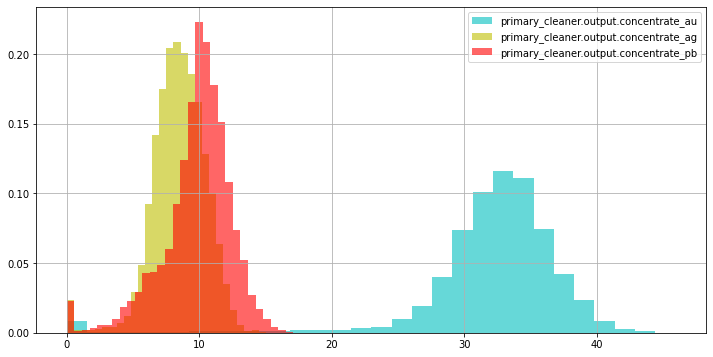

In [25]:
plt.figure(figsize=(12,6))
gold_full['primary_cleaner.output.concentrate_au'].hist(bins=30, density=True, label='primary_cleaner.output.concentrate_au', alpha=0.6, color='c')
gold_full['primary_cleaner.output.concentrate_ag'].hist(bins=30, density=True, label='primary_cleaner.output.concentrate_ag', alpha=0.6, color='y')
gold_full['primary_cleaner.output.concentrate_pb'].hist(bins=30, density=True, label='primary_cleaner.output.concentrate_pb', alpha=0.6, color='r')

plt.legend();

In [26]:
# Создаю датасеты с концентрациями металлов на финальной очистке
concetrates_final=[]
concetrates_final=pd.DataFrame(concetrates_final)
concetrates_final['final.output.concentrate_au']=gold_full['final.output.concentrate_au']
concetrates_final['final.output.concentrate_ag']=gold_full['final.output.concentrate_ag']
concetrates_final['final.output.concentrate_pb']=gold_full['final.output.concentrate_pb']

In [27]:
print(concetrates_final['final.output.concentrate_au'].mean())
print(concetrates_final['final.output.concentrate_ag'].mean())
print(concetrates_final['final.output.concentrate_pb'].mean())

44.0765129419528
5.168386967510243
9.978821384192907


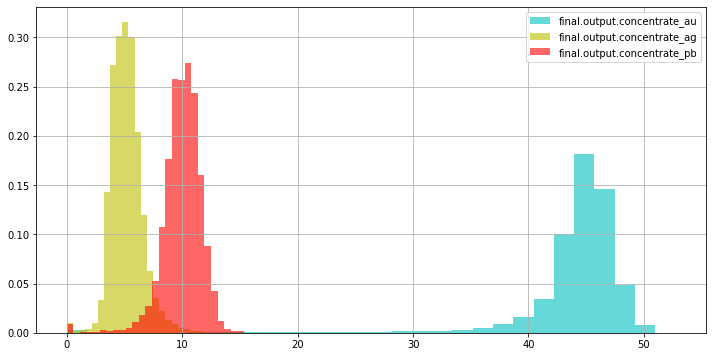

In [28]:
plt.figure(figsize=(12,6))
gold_full['final.output.concentrate_au'].hist(bins=30, density=True, label='final.output.concentrate_au', alpha=0.6, color='c')
gold_full['final.output.concentrate_ag'].hist(bins=30, density=True, label='final.output.concentrate_ag', alpha=0.6, color='y')
gold_full['final.output.concentrate_pb'].hist(bins=30, density=True, label='final.output.concentrate_pb', alpha=0.6, color='r')

plt.legend();

Вывод: По графику видим, что концентрация золота после финальной очистки увеличилась, концентрация серебра осталась примерно на том же уровне, а концентрация свинца также осталась примерно на том же уровне.

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. 

In [29]:
#print(gold_train['primary_cleaner.input.feed_ag'].mean())
gold_train_feed_au = gold_train['rougher.input.feed_au'].mean()
print(gold_train_feed_au)
gold_train_feed_ag = gold_train['rougher.input.feed_ag'].mean()
print(gold_train_feed_ag)
gold_train_feed_pb = gold_train['rougher.input.feed_pb'].mean()
print(gold_train_feed_pb)

7.866576841919407
8.579195196596277
3.5054646776095564


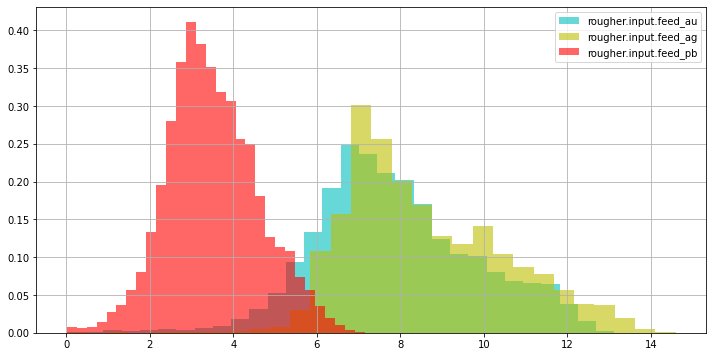

In [30]:
plt.figure(figsize=(12,6))
gold_train['rougher.input.feed_au'].hist(bins=30, density=True, label='rougher.input.feed_au', alpha=0.6, color='c')
gold_train['rougher.input.feed_ag'].hist(bins=30, density=True, label='rougher.input.feed_ag', alpha=0.6, color='y')
gold_train['rougher.input.feed_pb'].hist(bins=30, density=True, label='rougher.input.feed_pb', alpha=0.6, color='r')

plt.legend();

In [31]:
gold_test_feed_au = gold_test['rougher.input.feed_au'].mean()
print(gold_test_feed_au)
gold_test_feed_ag = gold_test['rougher.input.feed_ag'].mean()
print(gold_test_feed_ag)
gold_test_feed_pb = gold_test['rougher.input.feed_pb'].mean()
print(gold_test_feed_pb)

9.3346824565686
9.371939771979395
3.7980823845024076


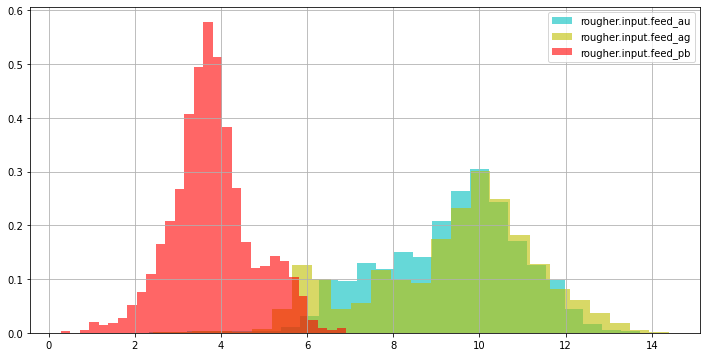

In [32]:
plt.figure(figsize=(12,6))
gold_test['rougher.input.feed_au'].hist(bins=30, density=True, label='rougher.input.feed_au', alpha=0.6, color='c')
gold_test['rougher.input.feed_ag'].hist(bins=30, density=True, label='rougher.input.feed_ag', alpha=0.6, color='y')
gold_test['rougher.input.feed_pb'].hist(bins=30, density=True, label='rougher.input.feed_pb', alpha=0.6, color='r')

plt.legend();

In [33]:
print('Размер гранулов au обучающей от тестовой составляет:', gold_train_feed_au/gold_test_feed_au)
print('Размер гранулов ag обучающей от тестовой составляет:', gold_train_feed_ag/gold_test_feed_ag)
print('Размер гранулов pb обучающей от тестовой составляет:', gold_train_feed_pb/gold_test_feed_pb)

Размер гранулов au обучающей от тестовой составляет: 0.8427257036883862
Размер гранулов ag обучающей от тестовой составляет: 0.9154129673610049
Размер гранулов pb обучающей от тестовой составляет: 0.922956461374603


Вывод: По графикам видно, что грануля сырья в тестовой выборке больше.

### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

In [34]:
# Считаем сумму концентраций металлов в сырье на исходных данных
gold_full['concentrate_sum_feed'] = gold_full['rougher.input.feed_ag']
+ gold_full['rougher.input.feed_au'] + gold_full['rougher.input.feed_pb']
print(gold_full['concentrate_sum_feed'].mean())

8.794927425814688


In [35]:
# Считаем сумму концентраций металлов в черновом концентрате на исходных данных
gold_full['concentrate_sum_output_concentrate'] = gold_full['rougher.output.concentrate_ag']
+ gold_full['rougher.output.concentrate_au'] + gold_full['rougher.output.concentrate_pb']
print(gold_full['concentrate_sum_output_concentrate'].mean())

11.994759359873429


In [36]:
# Считаем сумму концентраций металлов после финальной очистки на исходных данных
gold_full['concentrate_sum_final'] = gold_full['final.output.concentrate_ag'] + gold_full['final.output.concentrate_au']
+ gold_full['final.output.concentrate_pb']
print(gold_full['concentrate_sum_final'].mean())

49.244899909463044


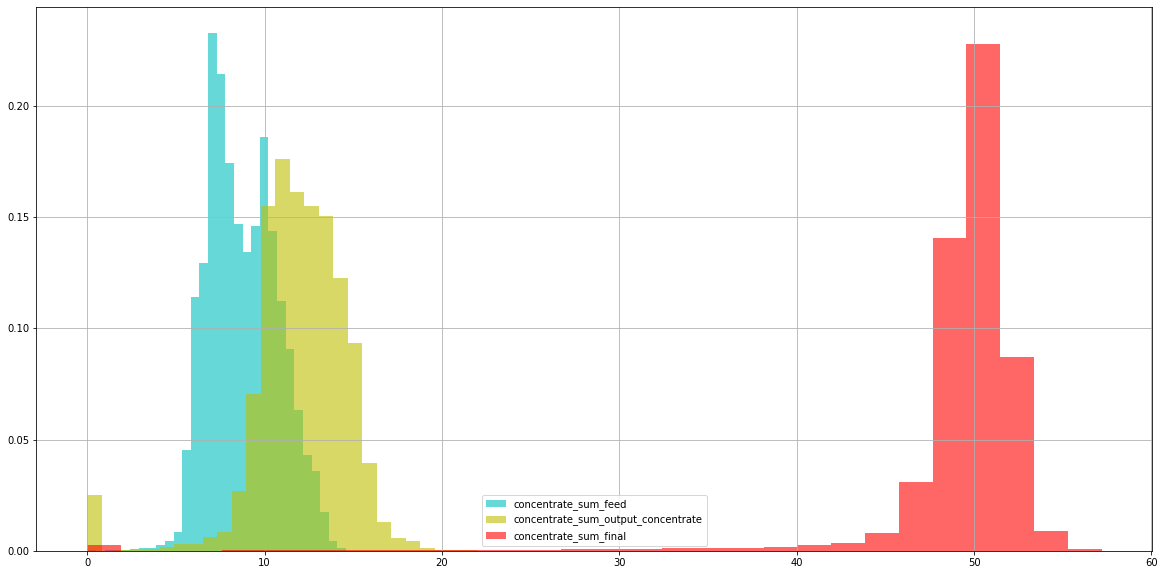

In [37]:
plt.figure(figsize=(20,10))
gold_full['concentrate_sum_feed'].hist(bins=30, density=True, label='concentrate_sum_feed', alpha=0.6, color='c')
gold_full['concentrate_sum_output_concentrate'].hist(bins=30, density=True, label='concentrate_sum_output_concentrate', alpha=0.6, color='y')
gold_full['concentrate_sum_final'].hist(bins=30, density=True, label='concentrate_sum_final', alpha=0.6, color='r')

plt.legend();

Видим много значений около 0, убираем все что меньше 4.

Видим боьшие выбросы до 40 убираем их.

In [38]:
gold_full=gold_full[gold_full['concentrate_sum_final']>40]
gold_full=gold_full[gold_full['concentrate_sum_feed']>4]
gold_full=gold_full[gold_full['concentrate_sum_output_concentrate']>4]

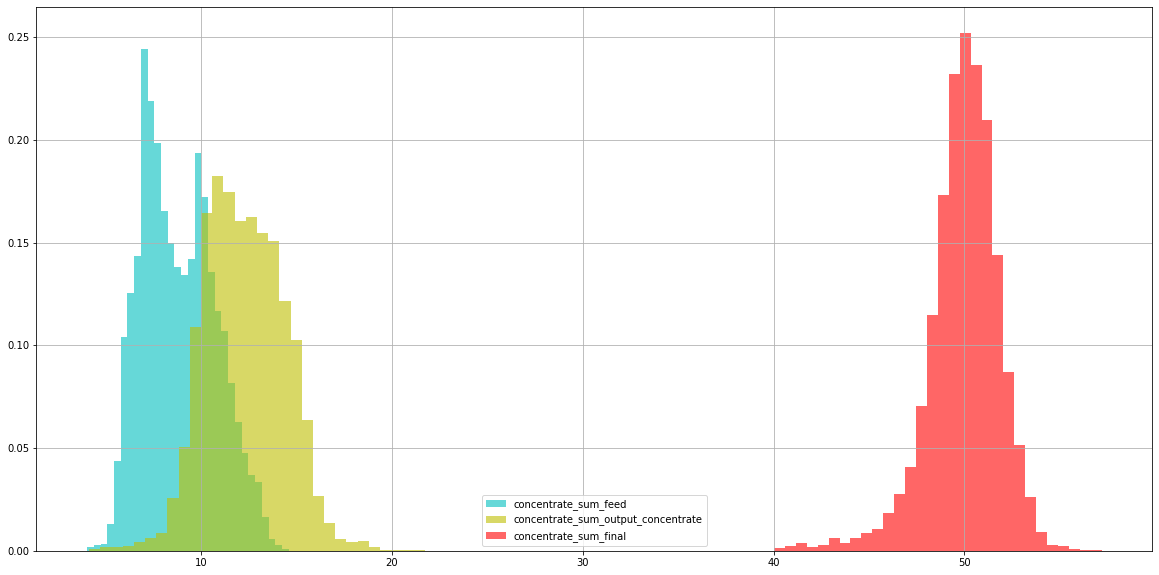

In [39]:
plt.figure(figsize=(20,10))
gold_full['concentrate_sum_feed'].hist(bins=30, density=True, label='concentrate_sum_feed', alpha=0.6, color='c')
gold_full['concentrate_sum_output_concentrate'].hist(bins=30, density=True, label='concentrate_sum_output_concentrate', alpha=0.6, color='y')
gold_full['concentrate_sum_final'].hist(bins=30, density=True, label='concentrate_sum_final', alpha=0.6, color='r')

plt.legend();

### Посчитаем сумму концентрации после флотации.

In [40]:
# Считаем сумму концентраций металлов после флотации на обучающих данных
gold_train['concentrate_sum_rougher'] = gold_train['rougher.output.concentrate_ag']
+ gold_train['rougher.output.concentrate_au'] + gold_train['rougher.output.concentrate_pb']
print(gold_train['concentrate_sum_rougher'].mean())

11.775812314356036


In [41]:
# Считаем сумму концентраций металлов после первичной очистки на обучающих данных данных
gold_train['concentrate_sum_primary_cleaner'] = gold_train['primary_cleaner.output.concentrate_ag']
+ gold_train['primary_cleaner.output.concentrate_au'] + gold_train['primary_cleaner.output.concentrate_pb']
print(gold_train['concentrate_sum_primary_cleaner'].mean())

8.200915815165981


In [42]:
# Считаем сумму концентраций металлов после финальной очистки на обучающих данных
gold_train['concentrate_sum_final'] = gold_train['final.output.concentrate_ag'] + gold_train['final.output.concentrate_au']
+ gold_train['final.output.concentrate_pb']
print(gold_train['concentrate_sum_final'].mean())

49.1457125459128


In [43]:
# Также удаляем выбросы для обучающей выборки
gold_train=gold_train[gold_train['concentrate_sum_final']>40]
gold_train=gold_train[gold_train['concentrate_sum_primary_cleaner']>4]
gold_train=gold_train[gold_train['concentrate_sum_rougher']>4]
gold_train=gold_train.reset_index()

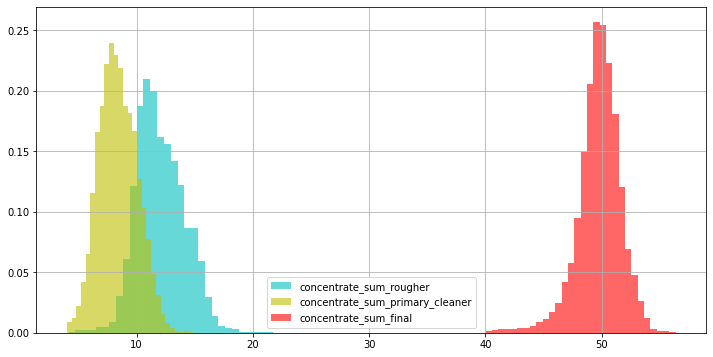

In [44]:
plt.figure(figsize=(12,6))
gold_train['concentrate_sum_rougher'].hist(bins=30, density=True, label='concentrate_sum_rougher', alpha=0.6, color='c')
gold_train['concentrate_sum_primary_cleaner'].hist(bins=30, density=True, label='concentrate_sum_primary_cleaner', alpha=0.6, color='y')
gold_train['concentrate_sum_final'].hist(bins=30, density=True, label='concentrate_sum_final', alpha=0.6, color='r')

plt.legend();

## Модель

### Функция для вычисления итоговой sMAPE.

In [45]:
def sMAPE(y_true,y_pred):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred))/2
    smape = ((numerator/denominator)*100).sum() / len(y_pred)
    return 0.25*smape[0] + 0.75*smape[1]

In [46]:
columns=gold_test.columns # Колонки которые в тестовой выборке
feature=gold_train[columns] # Формируем признаки Выбираем из trian только те колонки, которые есть в test
feature=feature.drop(['date'],axis=1)
target=gold_train[['rougher.output.recovery','final.output.recovery']] # Формируем вектор целевых признаков
target_array=np.array(target) # конвертирую в array
sample_size=int(len(target)/5)#Формирую длину датасета для кровв-валидации. Их будет 4

In [47]:
features_train, features_valid, target_train, target_valid = train_test_split(
    feature, target, test_size=0.25, random_state=12345) # разобьем на обучающую и валидационную выборки

In [48]:
# Кросс-валидация Линейная регрессия

model_regression = LinearRegression()
model_regression.fit(features_train, target_train)
prediction_regress = model_regression.predict(features_valid)   

smape_scorer = make_scorer(sMAPE, greater_is_better=False)
    
score = cross_val_score(model_regression, features_train, target_train, scoring=smape_scorer, cv=5).mean()

print(score)

-6.783430597737959


In [49]:
# Кросс-валидация Случайный лес

model_forest=RandomForestRegressor(random_state=1234)
model_forest.fit(features_train, target_train)
prediction_forest=model_forest.predict(features_valid)

param_grid = {'n_estimators': range (10, 51, 10),
              'max_depth': range (1,5, 1)}

smape_scorer = make_scorer(sMAPE, greater_is_better=False)

clf = RandomForestRegressor()
grid = GridSearchCV(clf, param_grid, scoring=smape_scorer,cv=5)

score = cross_val_score(model_forest, features_train, target_train, scoring=smape_scorer, cv=5).mean()

grid.fit(features_train, target_train)
print(grid.best_params_)

print(score)

{'max_depth': 4, 'n_estimators': 50}
-4.651747526521052


In [54]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train)
DummyRegressor()
dummy_regr.predict(features_train, return_std=False)
smape_scorer = make_scorer(sMAPE, greater_is_better=False)
    
score = cross_val_score(dummy_regr, features_train, target_train, scoring=smape_scorer, cv=5).mean()

print(score)

-9.070941436286596


### Сделаем предсказания на тестовой выборке.

In [55]:
target=gold_full[['date','rougher.output.recovery','final.output.recovery']]
gold_test=gold_test.merge(target,on=['date'],how='left')
gold_test=gold_test.dropna()

In [56]:
target=gold_test[['rougher.output.recovery','final.output.recovery']]
feature=gold_test.drop(['date','rougher.output.recovery','final.output.recovery'],axis=1)

In [57]:
prediction_reg=model_regression.predict(feature)
smape_line=sMAPE(prediction_reg,target)
print('sMAPE LinearRegression:', smape_line)

sMAPE LinearRegression: 7.042379276247026


In [58]:
prediction_forest=model_forest.predict(feature)
smape_forest=sMAPE(prediction_forest,target)
print('sMAPE RandomForestRegressor:', smape_forest)

sMAPE RandomForestRegressor: 7.5759598378943185


In [59]:
prediction_dummy=dummy_regr.predict(feature)
smape_dummy=sMAPE(prediction_dummy,target)
print('sMAPE DummyRegressor:', smape_dummy)

sMAPE DummyRegressor: 7.367145968070032


Вывод: По графикам видно, что грануля сырья в тестовой выборке больше.

По графикам при подсчете общей концентрации увидили что есть выбросы, при тесте не стали их удалять чтобы не подгонять к лучшему результату.

Видим что лучше всего себя показала модель sMAPE при линейной регресии 7.042379276247026.